In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
data = pd.read_csv("billboard_24years_lyrics_spotify.csv")

In [3]:
data.head()

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.000000,0.2510,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.000005,0.2950,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.807000,0.2990,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0
3,3,Maria Maria,Santana,/wiki/Maria_Maria,Maria Maria,/wiki/Santana_(band),2000,"Ladies and gents, turn up your sound systems\n...",spotify:track:3XKIUb7HzIF1Vu9usunMzc,0.777,...,0.002010,0.0348,0.680,97.911,audio_features,3XKIUb7HzIF1Vu9usunMzc,https://api.spotify.com/v1/tracks/3XKIUb7HzIF1...,https://api.spotify.com/v1/audio-analysis/3XKI...,261973.0,4.0
4,3,Maria Maria,The Product G&B,/wiki/Maria_Maria,Maria Maria,/wiki/The_Product_G%26B,2000,Turn up this sound system\nTo the sound of Car...,spotify:track:3XKIUb7HzIF1Vu9usunMzc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ranking           3397 non-null   int64  
 1   song              3397 non-null   object 
 2   band_singer       3397 non-null   object 
 3   songurl           3397 non-null   object 
 4   titletext         3397 non-null   object 
 5   url               3397 non-null   object 
 6   year              3397 non-null   int64  
 7   lyrics            3397 non-null   object 
 8   uri               3397 non-null   object 
 9   danceability      486 non-null    float64
 10  energy            486 non-null    float64
 11  key               486 non-null    float64
 12  loudness          486 non-null    float64
 13  mode              486 non-null    float64
 14  speechiness       486 non-null    float64
 15  acousticness      486 non-null    float64
 16  instrumentalness  486 non-null    float64


In [5]:
data.describe()

,ranking,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3397.000000,3397.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,50.102149,2011.769208,0.667459,0.685195,5.088477,-6.225352,0.592593,0.112230,0.163482,0.018879,0.169990,0.599695,116.609210,248755.316872,3.977366
std,28.725958,6.821920,0.143421,0.152945,3.460289,2.199694,0.491858,0.106911,0.181582,0.098301,0.149100,0.230685,29.657696,42266.789476,0.225905
min,1.000000,2000.000000,0.190000,0.119000,0.000000,-17.692000,0.000000,0.023600,0.000051,0.000000,0.027200,0.061200,62.876000,74080.000000,1.000000
25%,25.000000,2006.000000,0.580250,0.573500,2.000000,-7.514000,0.000000,0.036025,0.026850,0.000000,0.080175,0.429500,94.029000,222346.500000,4.000000
50%,50.000000,2012.000000,0.677000,0.695000,5.000000,-5.866000,1.000000,0.058300,0.084950,0.000000,0.113000,0.641500,106.153000,242753.000000,4.000000
75%,75.000000,2018.000000,0.772000,0.807000,8.000000,-4.753000,1.000000,0.162000,0.252750,0.000057,0.217000,0.791000,134.082750,271581.000000,4.000000
max,100.000000,2023.000000,0.956000,0.980000,11.000000,-1.299000,1.000000,0.505000,0.955000,0.925000,0.957000,0.969000,203.746000,432147.000000,5.000000


C:\Users\KEYUR\AppData\Local\Temp\ipykernel_7500\2085440142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


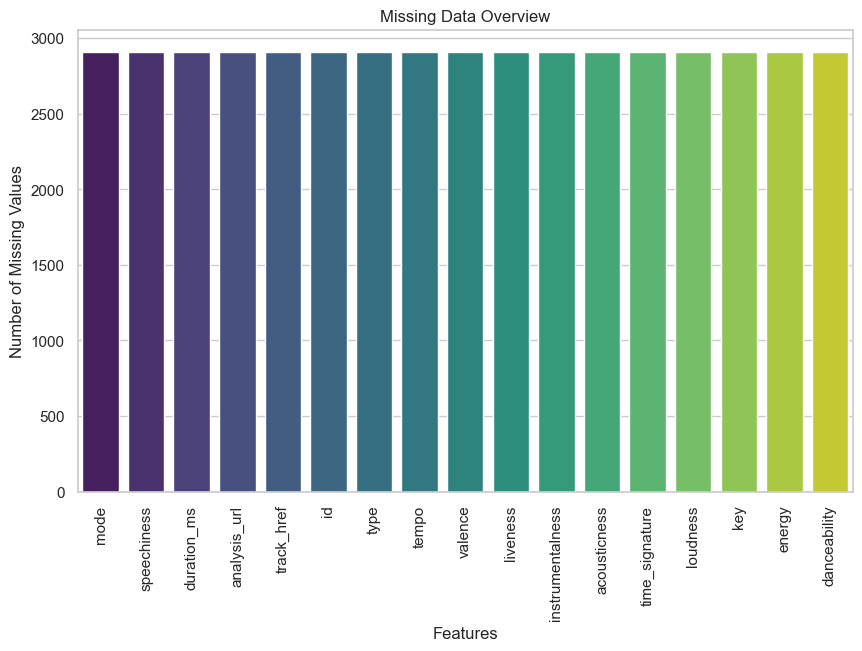

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Overview of Missing Data
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Missing Data Overview')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

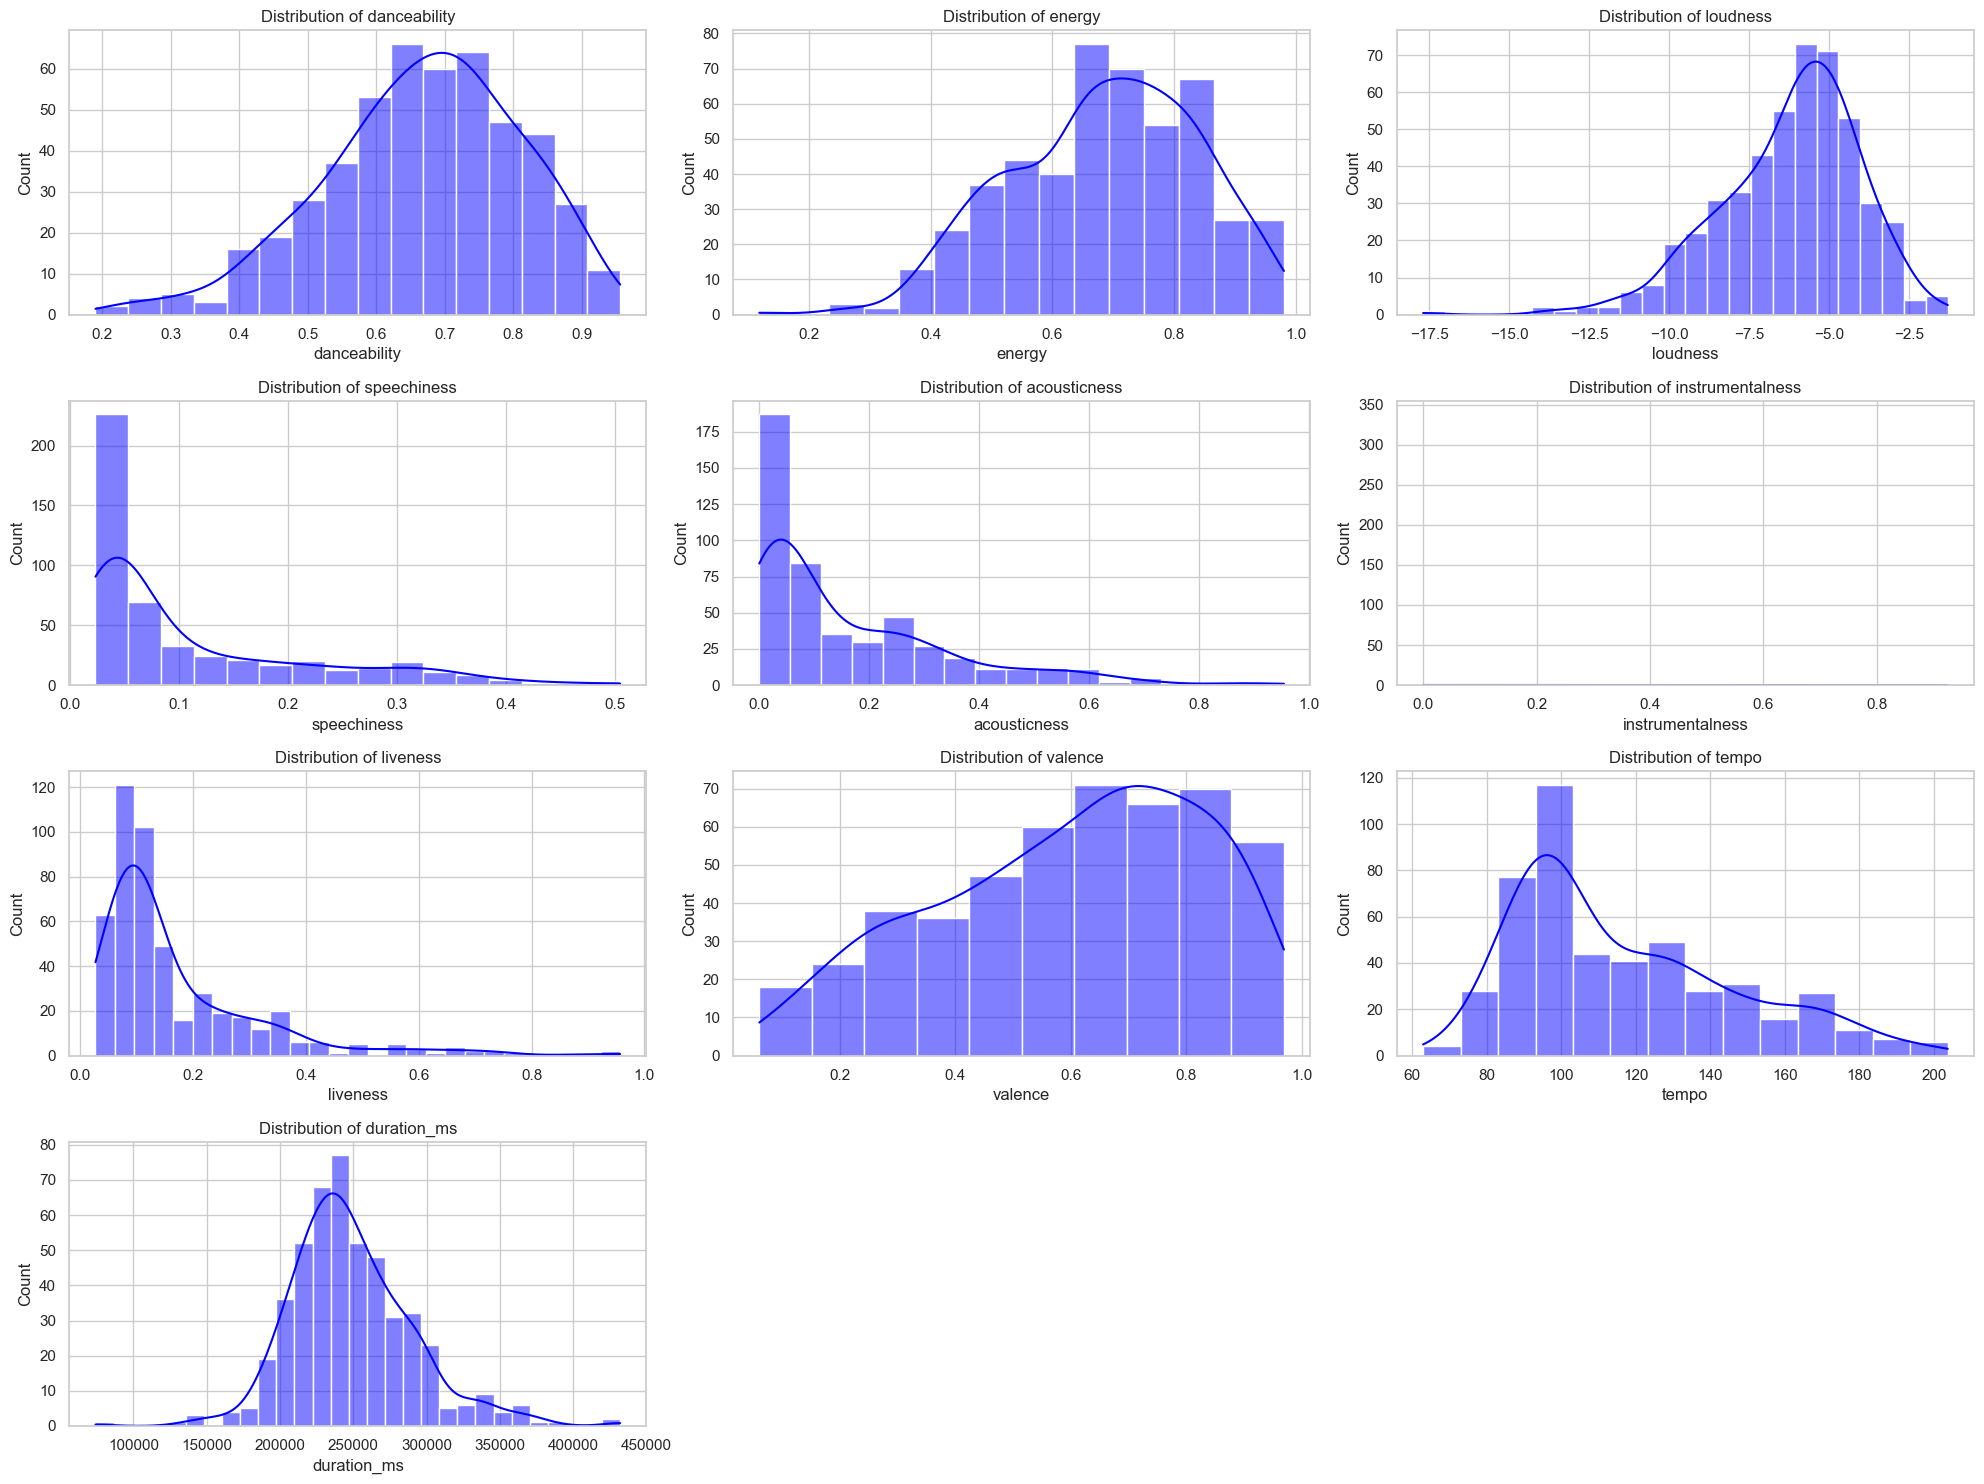

In [7]:
# Distribution of Numerical Features
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature].dropna(), kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

C:\Users\KEYUR\AppData\Local\Temp\ipykernel_7500\3028557835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


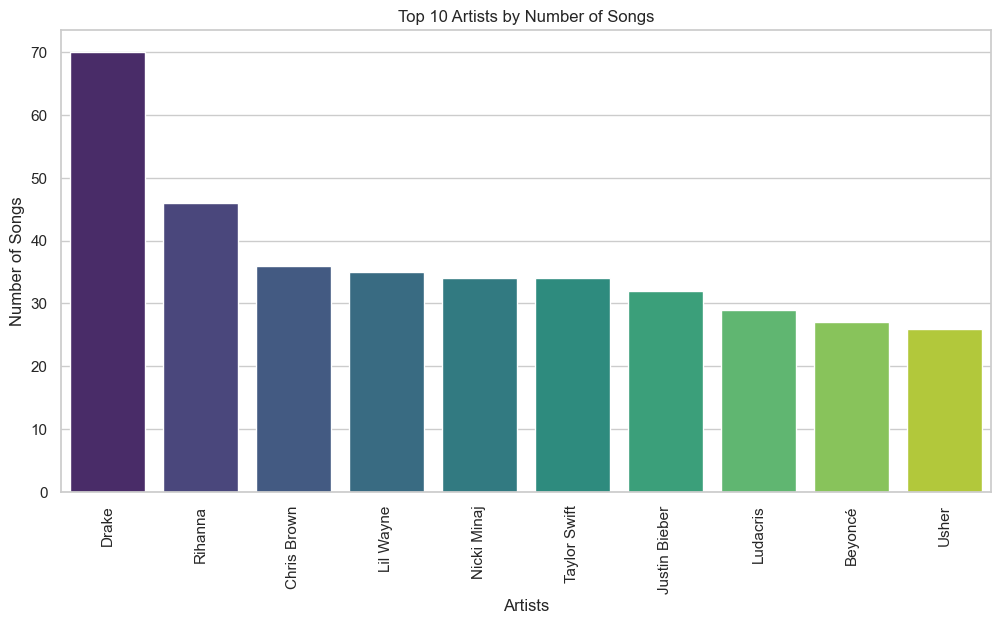

In [8]:
# Top Artists by Number of Songs
top_artists = data['band_singer'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artists')
plt.ylabel('Number of Songs')
plt.show()

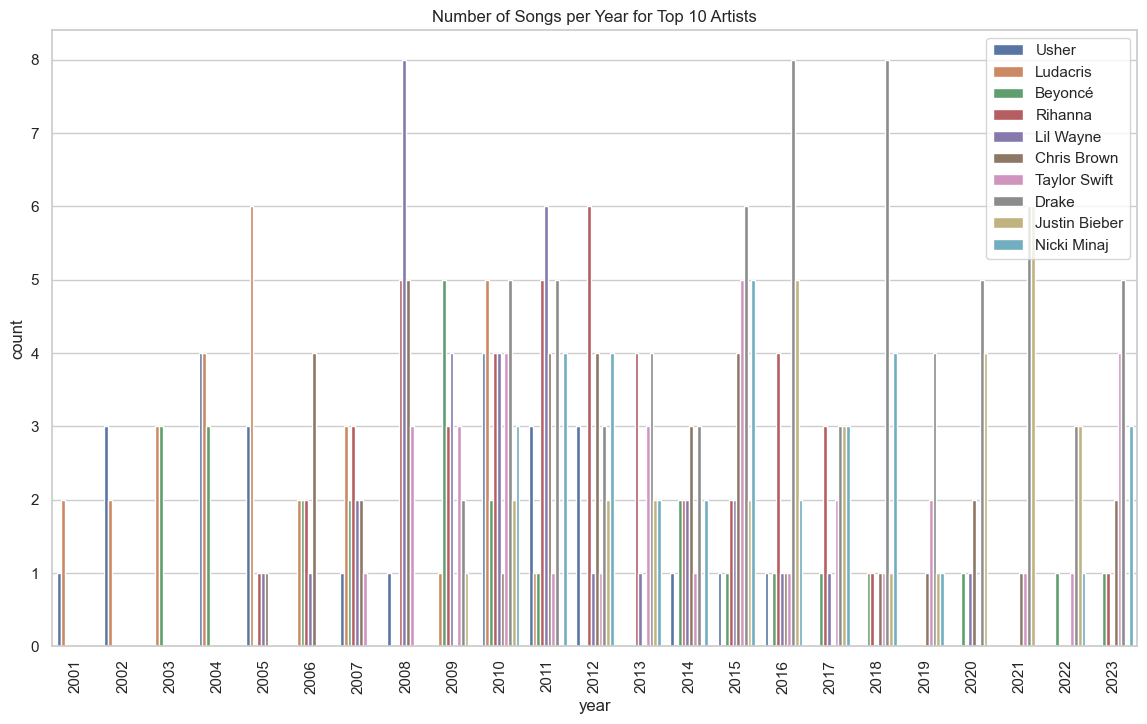

<Figure size 640x480 with 0 Axes>

In [9]:
# Top 10 artists with the most songs
top_artists = data['band_singer'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 artists
top_artists_df = data[data['band_singer'].isin(top_artists)]

# Plotting the number of songs per year for the top 10 artists
plt.figure(figsize=(14, 8))
sns.countplot(data=top_artists_df, x='year', hue='band_singer')
plt.title('Number of Songs per Year for Top 10 Artists')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

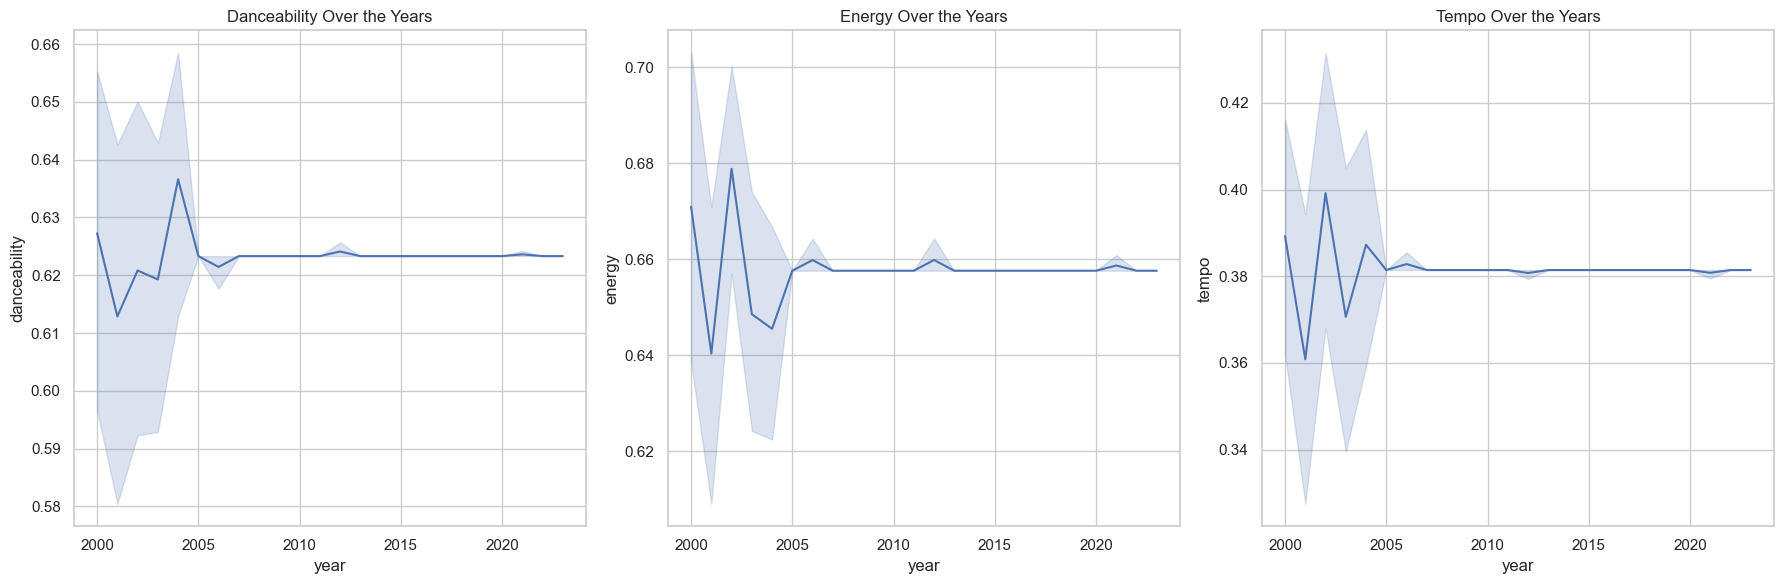

In [24]:
# Plotting trends in danceability, energy, and tempo over the years
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Danceability over the years
sns.lineplot(data=data, x='year', y='danceability', ax=axes[0])
axes[0].set_title('Danceability Over the Years')

# Energy over the years
sns.lineplot(data=data, x='year', y='energy', ax=axes[1])
axes[1].set_title('Energy Over the Years')

# Tempo over the years
sns.lineplot(data=data, x='year', y='tempo', ax=axes[2])
axes[2].set_title('Tempo Over the Years')

plt.tight_layout()
plt.show()


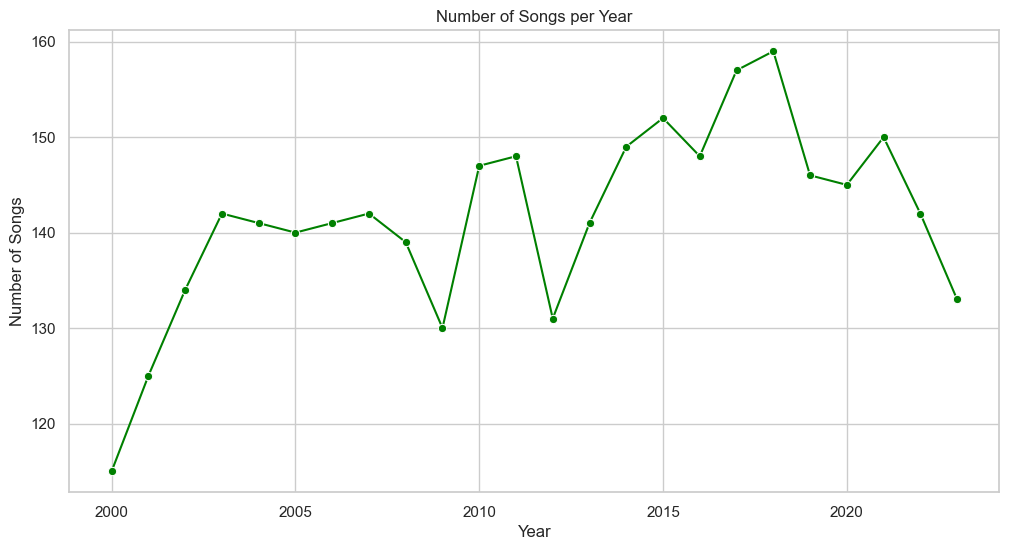

In [11]:
# Trends Over the Years
songs_per_year = data['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o', color='green')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

## Content-based Recommendations

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Feature Engineering
# Combining relevant audio features into a single feature vector
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data['audio_features'] = data[audio_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Vectorizing the lyrics using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['lyrics'].fillna(''))

# Vectorizing the audio features using TF-IDF
audio_vectorizer = TfidfVectorizer()
audio_tfidf_matrix = audio_vectorizer.fit_transform(data['audio_features'])

# Combining the TF-IDF vectors of lyrics and audio features
combined_tfidf_matrix = np.hstack((tfidf_matrix.toarray(), audio_tfidf_matrix.toarray()))

In [13]:
# Function to recommend songs based on a given song
def recommend_songs(song_title, df, combined_tfidf_matrix, top_n=10):
    # Find the index of the song
    idx = df[df['song'].str.contains(song_title, case=False, na=False)].index[0]

    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(combined_tfidf_matrix[idx].reshape(1, -1), combined_tfidf_matrix).flatten()

    # Get the top n similar songs
    similar_indices = cosine_similarities.argsort()[:-top_n-1:-1]

    # Return the top n similar songs
    return df.iloc[similar_indices][['song', 'band_singer', 'year']]

# Display the top 10 recommended songs for a given song title
recommended_songs = recommend_songs("Smooth", data, combined_tfidf_matrix)

recommended_songs

,song,band_singer,year
1,Smooth,Santana,2000
2,Smooth,Rob Thomas,2000
864,Don't Forget About Us,Mariah Carey,2006
836,Chasing Cars,Snow Patrol,2006
1022,Chasing Cars,Snow Patrol,2007
570,It's My Life,No Doubt,2004
439,Beautiful,Snoop Dogg,2003
2038,Can't Remember to Forget You,Shakira,2014
2039,Can't Remember to Forget You,Rihanna,2014
1043,The Great Escape,Boys Like Girls,2007


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Fill missing values for audio features with their respective means
data[audio_features] = data[audio_features].fillna(data[audio_features].mean())

# Normalize Audio Features
scaler = MinMaxScaler()
data[audio_features] = scaler.fit_transform(data[audio_features])

# Verify the changes
data[audio_features].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,0.623314,0.657602,0.462589,0.699484,0.592593,0.184108,0.171141,0.020410,0.153571,0.593186,0.381438
std,0.070757,0.067130,0.118879,0.050710,0.185878,0.083927,0.071859,0.040161,0.060600,0.096032,0.079562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.623314,0.657602,0.462589,0.699484,0.592593,0.184108,0.171141,0.020410,0.153571,0.593186,0.381438
50%,0.623314,0.657602,0.462589,0.699484,0.592593,0.184108,0.171141,0.020410,0.153571,0.593186,0.381438
75%,0.623314,0.657602,0.462589,0.699484,0.592593,0.184108,0.171141,0.020410,0.153571,0.593186,0.381438
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Recalculate cosine similarity with the cleaned and normalized dataset
feature_matrix = data[audio_features]
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Function to get song recommendations based on a given song index
def get_recommendations(song_index, num_recommendations=5):
    sim_scores = list(enumerate(cosine_sim[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    
    song_indices = [i[0] for i in sim_scores]
    return data.iloc[song_indices][['song', 'band_singer', 'year']]

# Test the recommendation system with an example song
example_song_index = 0  # Change this index to test with different songs
recommendations = get_recommendations(example_song_index)
recommendations

,song,band_singer,year
94,My Best Friend,Tim McGraw,2000
85,Swear It Again,Westlife,2000
208,Austin,Blake Shelton,2001
504,Have You Forgotten?,Darryl Worley,2003
355,The Good Stuff,Kenny Chesney,2002


## Collaborative Filtering

In [16]:
# Simulate user interactions
num_users = 100  # Number of simulated users
num_songs = data.shape[0]  # Number of songs

# Generate random user-item interactions
np.random.seed(42)
interaction_matrix = np.random.randint(0, 2, size=(num_users, num_songs))

# Convert to DataFrame for ease of use
interaction_df = pd.DataFrame(interaction_matrix, columns=data.index)

# Display a sample of the interaction matrix
interaction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,1,0,1,1,0,0,1
1,0,1,1,1,1,1,1,0,0,1,...,0,1,1,0,0,0,1,0,1,1
2,1,1,0,0,1,0,1,1,1,0,...,0,1,1,1,0,0,0,1,0,1
3,0,0,1,1,0,0,0,1,1,0,...,1,0,0,1,1,1,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,1,0,1


In [17]:
from sklearn.decomposition import TruncatedSVD


# Apply SVD with the corrected interaction DataFrame
svd = TruncatedSVD(n_components=20, random_state=42)
user_factors = svd.fit_transform(interaction_df)
song_factors = svd.components_.T

# Function to get song recommendations for a given user index
def get_collaborative_recommendations(user_index, num_recommendations=5):
    user_interactions = interaction_df.iloc[user_index]
    predicted_scores = np.dot(user_factors[user_index], song_factors.T)
    
    # Filter out songs the user has already interacted with
    user_interacted_items = user_interactions[user_interactions == 1].index
    predicted_scores[user_interacted_items] = -1  # Set already interacted items to -1
    
    # Get the top recommendations
    recommended_indices = predicted_scores.argsort()[-num_recommendations:][::-1]
    
    return data.iloc[recommended_indices][['song', 'band_singer', 'year']]

# Test the recommendation system with a simulated user
example_user_index = 0  # Change this index to test with different users
collaborative_recommendations = get_collaborative_recommendations(example_user_index)
collaborative_recommendations

,song,band_singer,year
837,Lips of an Angel,Hinder,2006
2502,No Promises,Cheat Codes,2017
542,Slow Jamz,Jamie Foxx,2004
1906,Wanted,Hunter Hayes,2013
116,Fallin',Alicia Keys,2001


## Hybrid Recommender

In [18]:
# Function to get hybrid recommendations
def get_hybrid_recommendations(song_index, user_index, num_recommendations=5):
    # Get content-based recommendations
    content_based_recommendations = get_recommendations(song_index, num_recommendations)
    
    # Get collaborative filtering recommendations
    collaborative_recommendations = get_collaborative_recommendations(user_index, num_recommendations)
    
    # Combine recommendations (concatenate and remove duplicates)
    combined_recommendations = pd.concat([content_based_recommendations, collaborative_recommendations]).drop_duplicates().head(num_recommendations)
    
    return combined_recommendations

# Test the hybrid recommendation system with an example song and user
example_song_index = 0  # Example song index for content-based filtering
example_user_index = 0  # Example user index for collaborative filtering

hybrid_recommendations = get_hybrid_recommendations(example_song_index, example_user_index)
hybrid_recommendations

,song,band_singer,year
94,My Best Friend,Tim McGraw,2000
85,Swear It Again,Westlife,2000
208,Austin,Blake Shelton,2001
504,Have You Forgotten?,Darryl Worley,2003
355,The Good Stuff,Kenny Chesney,2002


## Lyrics-based

In [19]:
# Reprocess the lyrics using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['lyrics'].fillna(''))

# Recalculate cosine similarity between song lyrics
cosine_sim_lyrics = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get lyric-based recommendations
def get_lyric_recommendations(song_index, num_recommendations=5):
    sim_scores = list(enumerate(cosine_sim_lyrics[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    
    song_indices = [i[0] for i in sim_scores]
    return data.iloc[song_indices][['song', 'band_singer', 'year']]

# Test the lyric-based recommendation system with an example song
lyric_recommendations = get_lyric_recommendations(example_song_index)
lyric_recommendations

,song,band_singer,year
1165,Suffocate,J. Holiday,2008
1087,No Air,Jordin Sparks,2008
1088,No Air,Chris Brown,2008
2588,In My Blood,Shawn Mendes,2018
1818,The Way,Ariana Grande,2013


## Visualisation of content based recommender

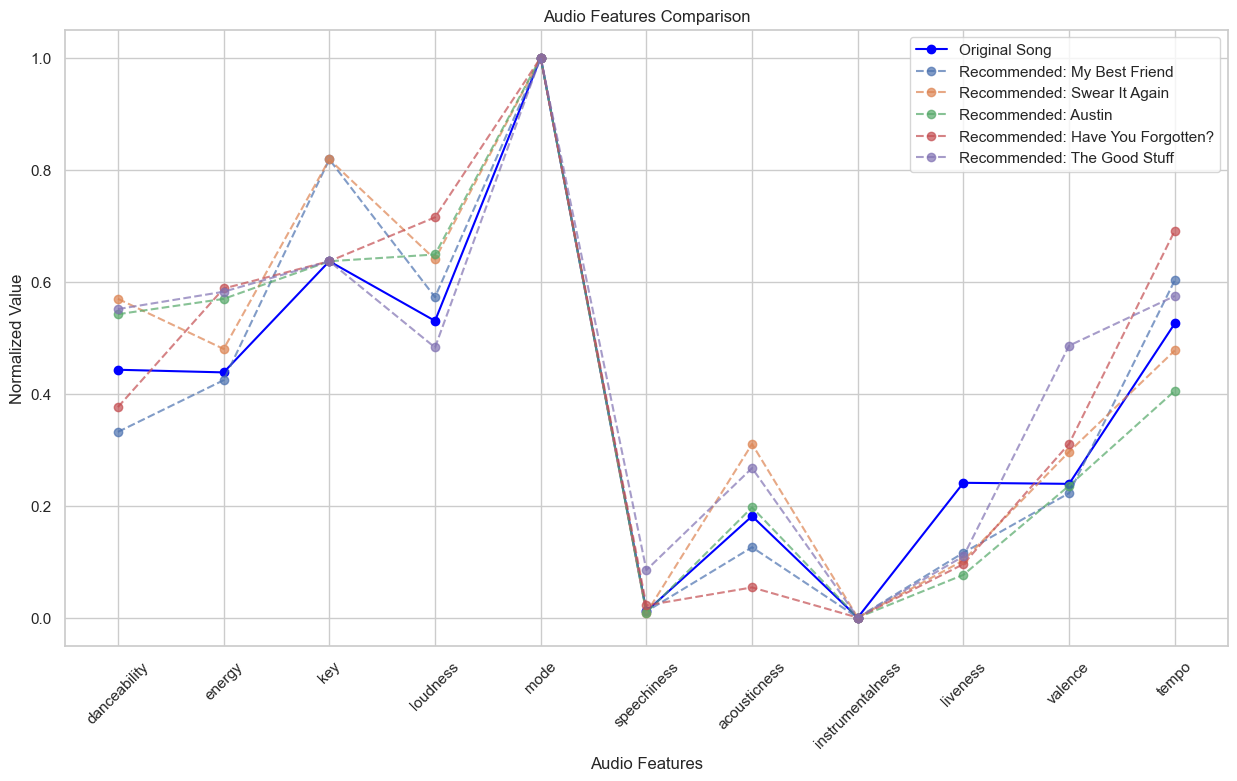

In [20]:
# Function to plot audio features of the original song and recommended songs
def plot_audio_features(song_index, recommendations):
    original_song = data.iloc[song_index]
    recommended_songs = data.loc[recommendations.index]

    # Plot audio features
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Original song
    ax.plot(audio_features, original_song[audio_features], marker='o', label='Original Song', color='blue')

    # Recommended songs
    for idx, row in recommended_songs.iterrows():
        ax.plot(audio_features, row[audio_features], marker='o', linestyle='--', label=f'Recommended: {row["song"]}', alpha=0.7)

    ax.set_title('Audio Features Comparison')
    ax.set_xlabel('Audio Features')
    ax.set_ylabel('Normalized Value')
    ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot the audio features for content-based filtering recommendations
plot_audio_features(example_song_index, recommendations)

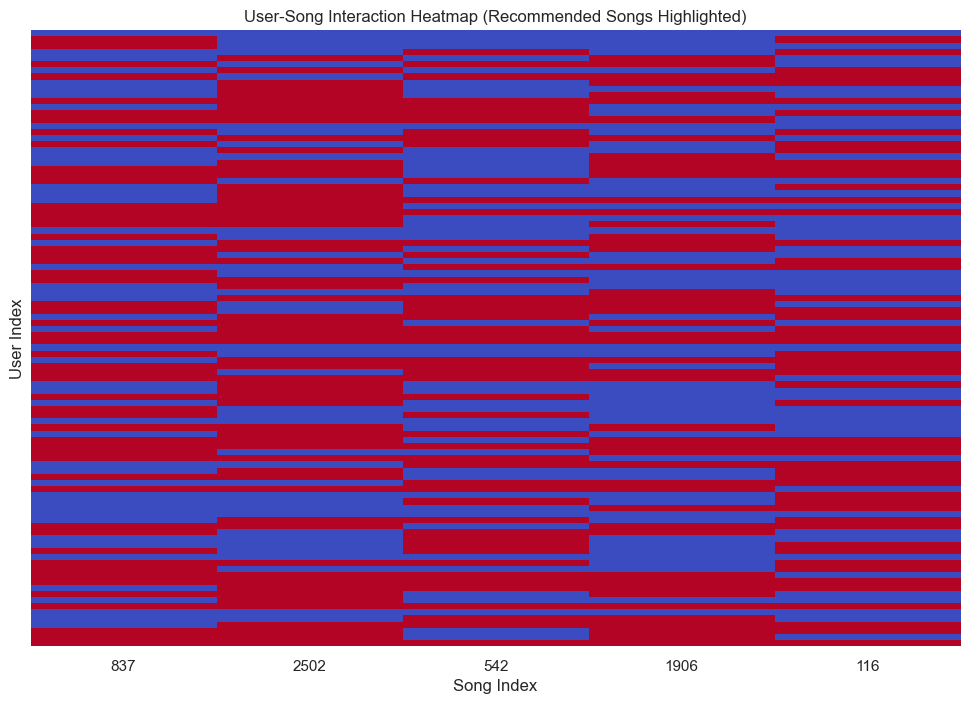

In [21]:
# Function to plot a heatmap of user-song interactions
def plot_user_song_interactions(user_index, recommendations):
    # Create a heatmap of the interaction matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(interaction_df.iloc[:, recommendations.index], cmap='coolwarm', cbar=False, yticklabels=False)
    plt.title('User-Song Interaction Heatmap (Recommended Songs Highlighted)')
    plt.xlabel('Song Index')
    plt.ylabel('User Index')
    
    # Highlight the recommended songs for the specific user
    for idx in recommendations.index:
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=1)

    plt.show()

# Plot the user-song interactions for collaborative filtering recommendations
plot_user_song_interactions(example_user_index, collaborative_recommendations)

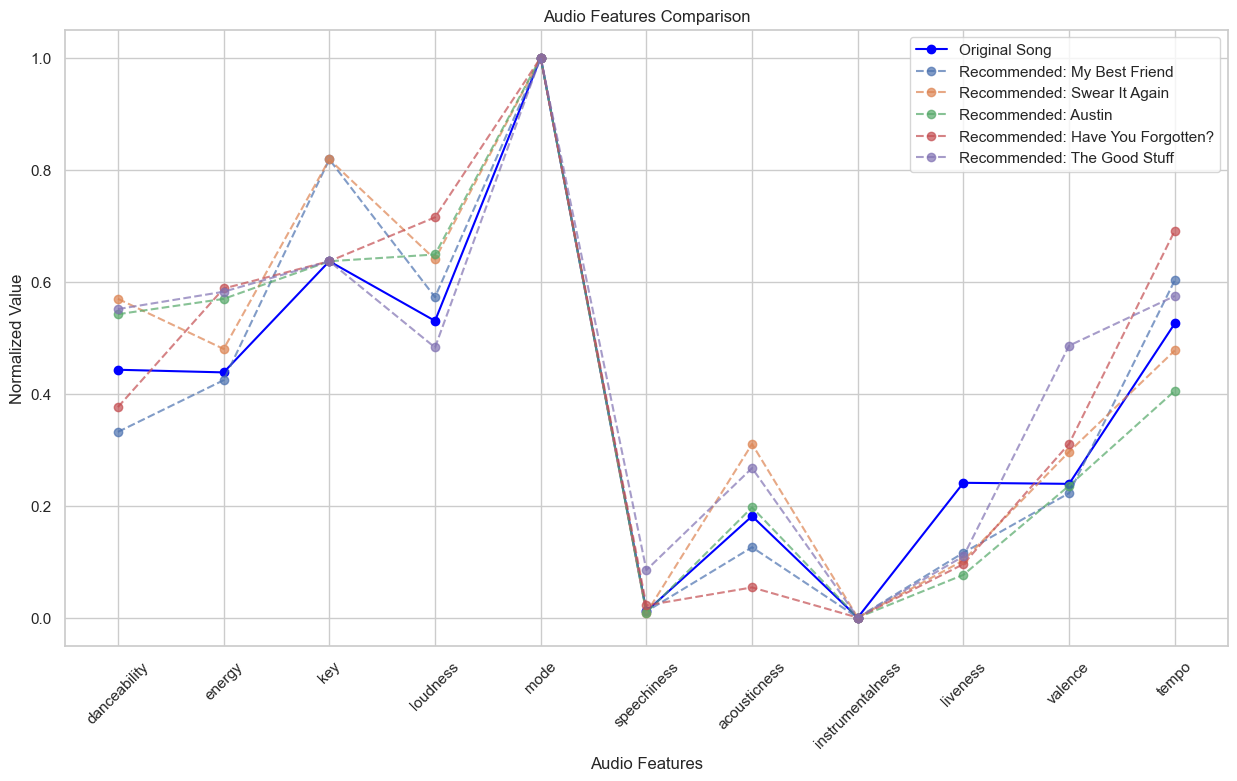

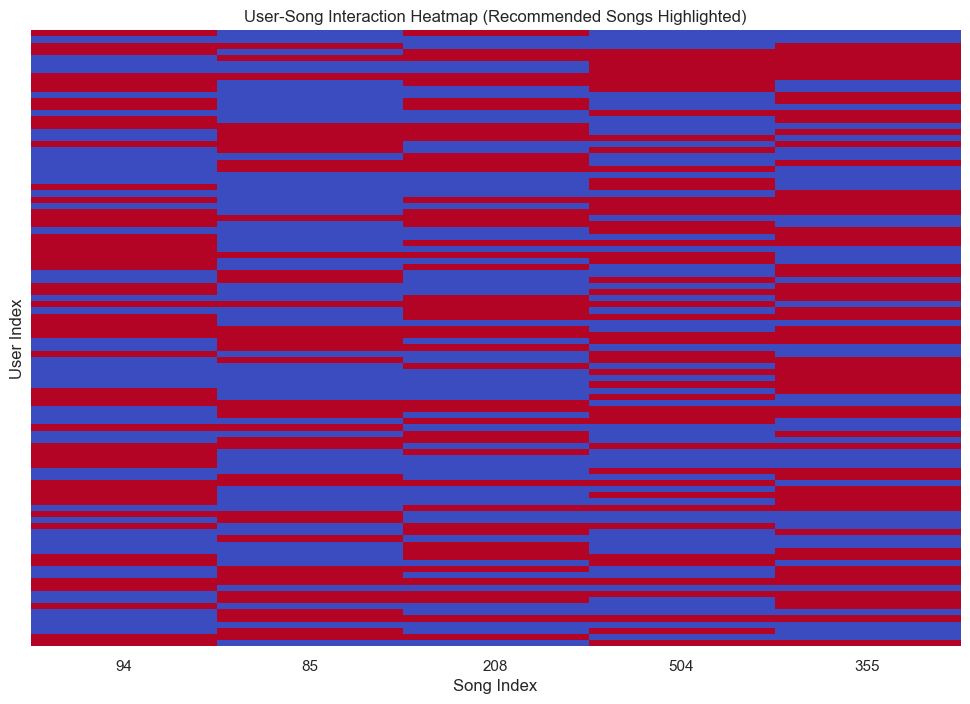

In [22]:
# Function to plot combined visualizations for hybrid approach recommendations
def plot_hybrid_recommendations(song_index, user_index, recommendations):
    # Plot audio features comparison
    plot_audio_features(song_index, recommendations)
    
    # Plot user-song interaction heatmap
    plot_user_song_interactions(user_index, recommendations)

# Plot the hybrid approach recommendations
plot_hybrid_recommendations(example_song_index, example_user_index, hybrid_recommendations)

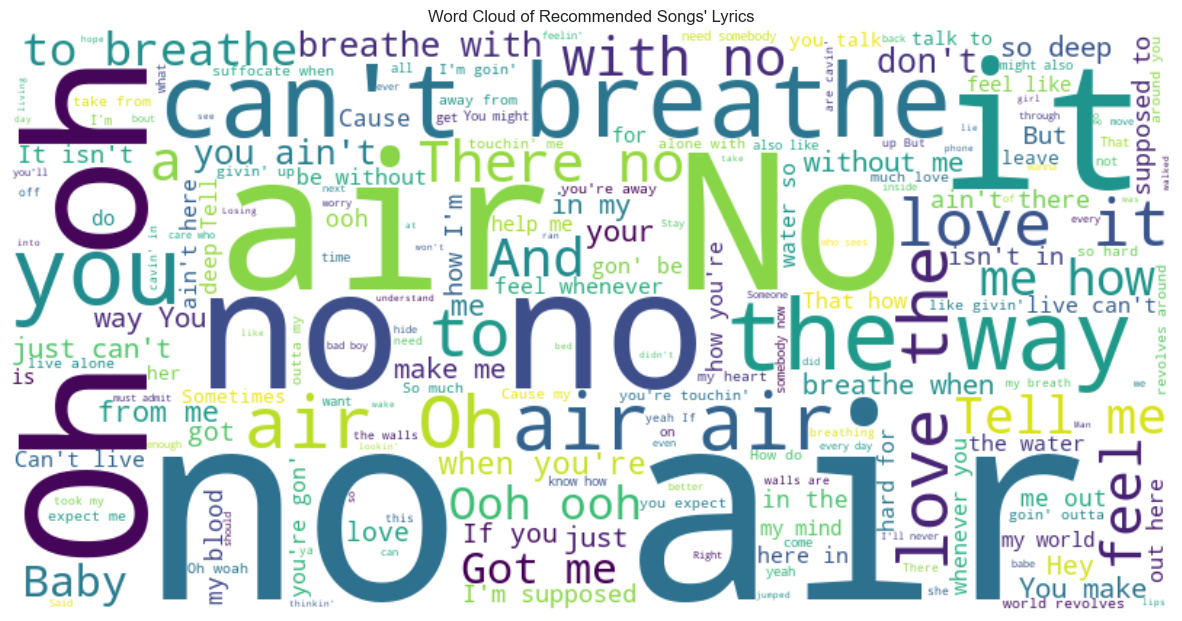

In [23]:
from wordcloud import WordCloud

# Function to create a word cloud from the lyrics of the recommended songs
def plot_lyric_word_cloud(recommendations):
    lyrics = " ".join(data.loc[recommendations.index]['lyrics'].fillna(''))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(lyrics)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Recommended Songs\' Lyrics')
    plt.show()

# Plot the word cloud for lyric-based recommendations
plot_lyric_word_cloud(lyric_recommendations)